In [50]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from os.path import join

sns.set(font_scale=1.5, style='ticks', context='paper')
plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = 'Courier New'

In [7]:
def assign_region_names(df, missing=False):
    '''
    Input: 
    df = dataframe (variable x columns) with column containing region names in ABCD var ontology, 
    Output: 
    df = same dataframe, but with column mapping region variables to actual region names
    missing = optional, list of ABCD region names not present in region_names dictionary
    '''
    region_names = pd.read_csv('region_names.csv', header=0, index_col=0)
    print(region_names.index)
    # read in region names 
    missing = []
    df = df.copy()
    if not 'long_region' in df.columns:
        df['measure'] = ''
        df['region'] = ''
        df['modality'] = ''
        df['atlas'] = ''
        df['long_region'] = ''
        df['hemisphere'] = ''
        df['cog'] = ''
        df['cog2'] = ''
        df['sys'] = ''
        for var in df.index:
            #print(var)
            trim_var = var.split('.')[0]
            
            var_list = trim_var.split('_')
            
            df.at[var, 'modality'] = var_list[0]
            df.at[var, 'measure'] = var_list[1]
            df.at[var, 'atlas'] = var_list[2]
            region = '_'.join(var_list[3:])
            df.at[var, 'region'] = region
            if 'scs' in trim_var:
                if 'rsirni' in var:
                    df.at[var, 'measure'] = 'rsirnigm'
                elif 'rsirnd' in var:
                    df.at[var, 'measure'] = 'rsirndgm'
                elif '_scs_' in region:
                    temp = region.split('_scs_')
                    one = region_names.loc[temp[0]]
                    #print(one, two)
                    two = region_names.loc[temp[1]]
                    #print(one, two)
                    region_name = f'{one["name"]} {two["name"]}'
                    #print(region_name)
                    hemisphere = two['hemi']
                    df.at[var, 'long_region'] = region_name
                    df.at[var, 'hemisphere'] = hemisphere
                    df.at[var, 'measure'] = 'subcortical-network fc'
                    df.at[var, 'cog'] = f'{one["cog"]} + {two["cog"]}'
                    df.at[var, 'cog2'] = f'{one["cog2"]} + {two["cog2"]}'
                    df.at[var, 'sys'] = f'{one["sys"]} + {two["sys"]}'
                else:
                    pass
            elif '_ngd_' in region:
                temp = region.split('_ngd_')
                if temp[0] == temp[1]:
                    df.at[var, 'measure'] = 'within-network fc'
                else:
                    df.at[var, 'measure'] = 'between-network fc'
                one = region_names.loc[temp[0]]
                two = region_names.loc[temp[1]]
                region_name = f"{one['name']}-{two['name']}"
                #print(one['name'], two['name'], region_name)
                hemisphere = two['hemi']
                df.at[var, 'long_region'] = region_name
                df.at[var, 'hemisphere'] = hemisphere
                df.at[var, 'cog'] = f'{one["cog"]} + {two["cog"]}'
                df.at[var, 'cog2'] = f'{one["cog2"]} + {two["cog2"]}'
                df.at[var, 'sys'] = f'{one["sys"]} + {two["sys"]}'
            elif str(region) not in (region_names.index):
                missing.append(region)
            else:
                one = region_names.loc[region]
                df.at[var, 'long_region'] = one['name']
                df.at[var, 'hemisphere'] = one['hemi']
                df.at[var, 'cog'] = one["cog"]
                df.at[var, 'cog2'] = one["cog2"]
                df.at[var, 'sys'] = one["sys"]

        df = df[df['measure'] != 't1w']
        df = df[df['measure'] != 't2w']
    else:
        pass

    print(f'missed {len(missing)} regions bc they weren\'t in the dict')
    return df

In [3]:
PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [5]:
var_df = pd.read_pickle(join(PROJ_DIR, OUTP_DIR, 'variance_flinger-alpha<0.0.pkl'))

In [10]:
var_regions = assign_region_names(var_df)

Index(['aal', 'aalh', 'aar', 'aarh', 'ablh', 'abrh', 'ad', 'ad_ngd_ad', 'aglh',
       'agrh',
       ...
       'vdclh', 'vdcrh', 'vedclh', 'vedcrh', 'ventraldclh', 'ventraldcrh',
       'vs', 'vta', 'vtdclh', 'vtdcrh'],
      dtype='object', name='var', length=306)
missed 0 regions bc they weren't in the dict


In [13]:
sociodem = [
    'fligner_raceth',
    'fligner_income',
    'fligner_edu',
    'fligner_marital'
]

In [23]:
small_df = var_df.swaplevel(axis=1)['stat'][sociodem]

In [25]:
small_p = var_df.swaplevel(axis=1)['p'][sociodem]

In [72]:
thick_hsk = small_df.filter(like='smri_thick', axis=0).astype(float)
fa_hsk = small_df.filter(like='dmri_dtifa', axis=0).astype(float)
var_hsk = small_df.filter(like='rsfmri_var_cdk', axis=0).astype(float)

In [73]:
var_hsk = assign_region_names(var_hsk)
fa_hsk = assign_region_names(fa_hsk)
thick_hsk = assign_region_names(thick_hsk)

Index(['aal', 'aalh', 'aar', 'aarh', 'ablh', 'abrh', 'ad', 'ad_ngd_ad', 'aglh',
       'agrh',
       ...
       'vdclh', 'vdcrh', 'vedclh', 'vedcrh', 'ventraldclh', 'ventraldcrh',
       'vs', 'vta', 'vtdclh', 'vtdcrh'],
      dtype='object', name='var', length=306)
missed 0 regions bc they weren't in the dict
Index(['aal', 'aalh', 'aar', 'aarh', 'ablh', 'abrh', 'ad', 'ad_ngd_ad', 'aglh',
       'agrh',
       ...
       'vdclh', 'vdcrh', 'vedclh', 'vedcrh', 'ventraldclh', 'ventraldcrh',
       'vs', 'vta', 'vtdclh', 'vtdcrh'],
      dtype='object', name='var', length=306)
missed 0 regions bc they weren't in the dict
Index(['aal', 'aalh', 'aar', 'aarh', 'ablh', 'abrh', 'ad', 'ad_ngd_ad', 'aglh',
       'agrh',
       ...
       'vdclh', 'vdcrh', 'vedclh', 'vedcrh', 'ventraldclh', 'ventraldcrh',
       'vs', 'vta', 'vtdclh', 'vtdcrh'],
      dtype='object', name='var', length=306)
missed 0 regions bc they weren't in the dict


In [81]:
long_regions = pd.concat([thick_hsk, var_hsk], axis=0)

In [112]:
long_regions['region'].unique

<bound method Series.unique of smri_thick_cdk_banksstslh.change_score    banksstslh
smri_thick_cdk_cdacatelh.change_score      cdacatelh
smri_thick_cdk_cdmdfrlh.change_score        cdmdfrlh
smri_thick_cdk_cuneuslh.change_score        cuneuslh
smri_thick_cdk_ehinallh.change_score        ehinallh
                                             ...    
rsfmri_var_cdk_smrh.change_score                smrh
rsfmri_var_cdk_fpolerh.change_score          fpolerh
rsfmri_var_cdk_tpolerh.change_score          tpolerh
rsfmri_var_cdk_tvtrh.change_score              tvtrh
rsfmri_var_cdk_insularh.change_score        insularh
Name: region, Length: 136, dtype: object>

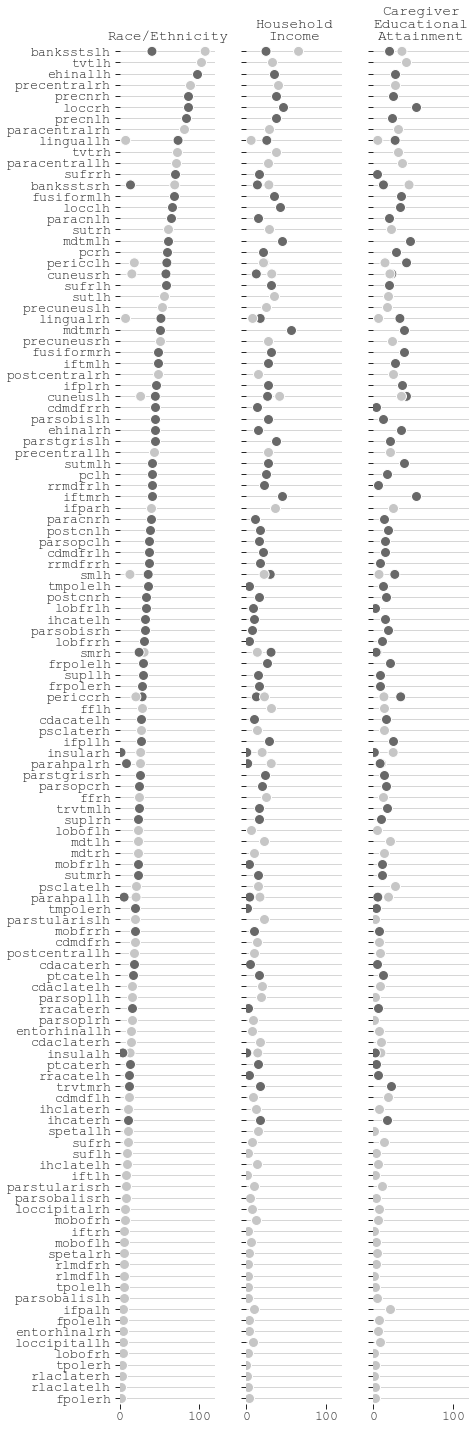

In [124]:
# Make the PairGrid
g = sns.PairGrid(long_regions.sort_values("fligner_raceth", ascending=False),
                 x_vars=long_regions.columns[:3], y_vars=['region'],hue='measure',
                 height=20, aspect=.1, palette='Greys')

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 120), xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Race/Ethnicity", "Household\nIncome", "Caregiver\nEducational\nAttainment"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
ax.get_legend()
sns.despine(left=True, bottom=True)

In [97]:
fa_hsk

,fligner_raceth,fligner_income,fligner_edu,fligner_marital,measure,region,modality,atlas,long_region,hemisphere,cog,cog2,sys
dmri_dtifa_fiberat_fxrh.change_score,14.381218,17.537042,10.234688,6.489763,dtifa,fxrh,dmri,fiberat,Fornix,R,memory,NaN,medial temporal lobe
dmri_dtifa_fiberat_fxlh.change_score,19.640547,7.048934,16.834162,13.600021,dtifa,fxlh,dmri,fiberat,Fornix,L,memory,NaN,medial temporal lobe
dmri_dtifa_fiberat_cgcrh.change_score,19.359108,9.052236,11.517154,5.430441,dtifa,cgcrh,dmri,fiberat,Cingulum - Cinglulate,R,executive function,emotion,NaN
dmri_dtifa_fiberat_cgclh.change_score,31.273468,20.748908,27.020240,12.735051,dtifa,cgclh,dmri,fiberat,Cingulum - Cinglulate,L,executive function,emotion,NaN
dmri_dtifa_fiberat_cghrh.change_score,5.514181,6.734757,7.991566,0.610944,dtifa,cghrh,dmri,fiberat,Cingulum - Parahippocampal,R,memory,NaN,medial temporal lobe
dmri_dtifa_fiberat_cghlh.change_score,22.916455,12.551605,16.324325,6.448357,dtifa,cghlh,dmri,fiberat,Cingulum - Parahippocampal,L,memory,NaN,medial temporal lobe
dmri_dtifa_fiberat_cstrh.change_score,15.910813,21.425501,17.269387,8.488774,dtifa,cstrh,dmri,fiberat,Corticospinal Tract,R,motor,NaN,sensorimotor
dmri_dtifa_fiberat_cstlh.change_score,5.920889,7.995262,9.467520,4.285770,dtifa,cstlh,dmri,fiberat,Corticospinal Tract,L,motor,NaN,sensorimotor
dmri_dtifa_fiberat_atrrh.change_score,35.328825,33.587274,15.902129,7.414141,dtifa,atrrh,dmri,fiberat,Anterior Thalamic Radiation,R,executive function,NaN,NaN
dmri_dtifa_fiberat_atrlh.change_score,31.863403,33.256055,18.660596,9.746503,dtifa,atrlh,dmri,fiberat,Anterior Thalamic Radiation,L,executive function,NaN,NaN
